# Yandex Cup 2020 - Аналитика

### Задача 1

A. Посчитать лгунов в стране
В государстве живёт 10 000 человек. Они делятся на правдолюбов и лгунов. Правдолюбы говорят правду с вероятностью 80%, а лгуны — с вероятностью 40%. Государство решило подсчитать правдолюбов и лгунов на основе опроса 100 жителей. Каждый раз случайно выбранного человека спрашивают: «Вы лгун?» — и записывают ответ. Однако один человек может поучаствовать в опросе несколько раз. Если житель уже участвовал в опросе — он отвечает то же самое, что и в первый раз. Мы знаем, что правдолюбов 70%, а лгунов 30%. Какая вероятность того, что государство недооценит количество лгунов, т. е. опрос покажет, что лгунов меньше 30%? Дайте ответ в процентах с точкой в качестве разделителя, результат округлите до сотых (пример ввода: 00.00).

### Решение

Лгуны говорят правду с вероятностью 40%, правдолюбы - 80%. Матожидание количества правдолюбов и лгунов в выборке составит 70 и 30 человек. Из 70 правдолюбов $70 \times 80% = 56$ человек скажет, что они правдолюбы, а оставшиеся 14, что они лгуны. Из 30 лгунов 60%, то есть 18, скажет, что они правдолюбы, а 12, что они лгуны. В итоге по результатам опроса получится, что 74 человека - правдолюбы, а 26 - лгуны. Таким образом получим, что вероятность получить ответ лгун в каждом конкретном случае 0,26.

Задача сводится к тому, чтобы найти вероятность того, что при 100 испытаниях количество лгунов окажется меньше 30%. Распределение количества «успехов» в последовательности из $n$ независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна $p$ называется биномиальным распределением.

In [4]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

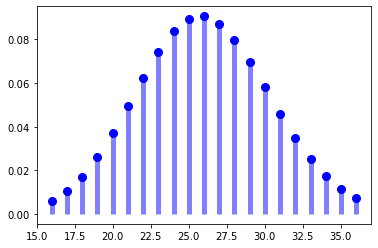

In [16]:
fig, ax = plt.subplots(1, 1)
n, p = 100, 0.26
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);

In [31]:
prob = binom.cdf(29, n, p)*100
print('Решение {}'.format(round(prob,2)))

Решение 78.95


## Задача Б - Театральный сезон и телефоны

Международный сервис по продаже билетов решил подвести итоги театрального сезона. В качестве одной из метрик руководитель проекта хочет посчитать количество пользователей, которые покупали билеты на разные спектакли.
При покупке билета пользователь указывает номер своего телефона. Необходимо найти спектакль с наибольшим числом уникальных телефонных номеров. И посчитать количество соответствующих уникальных телефонных номеров.
Зарегистрироваться на направление Аналитика и другие треки чемпионата вы можете на сайте Yandex Cup.

### Формат ввода
Логи покупок доступны в файле ticket_logs.csv. В первом столбце название спектакля из базы сервиса. Во втором - номер телефона, который оставил пользователь при покупке. Отметим, что в целях конспирации телефонные коды стран заменены на необслуживаемые в настоящий момент зоны.

### Формат вывода
Число уникальных номеров.

### Решение

In [32]:
import pandas as pd

In [36]:
tickets = pd.read_csv('ticket_logs.csv',header=None)
tickets.columns = ['perf', 'num']
tickets.head()

,perf,num
0,Кошки,+88029264576
1,Норма,8805-630-71-19
2,Евгений Онегин,8-(802)-235-30-28
3,Вестсайдская история,8-803-151-78-95
4,Дон Кихот,8-802-311-48-72


In [37]:
import re

In [38]:
pattern = '\D'
tickets.num = tickets.num.apply(lambda x: re.sub(pattern, r'', x))
tickets.head()

,perf,num
0,Кошки,88029264576
1,Норма,88056307119
2,Евгений Онегин,88022353028
3,Вестсайдская история,88031517895
4,Дон Кихот,88023114872


In [54]:
tickets = tickets.drop_duplicates()
display(tickets.groupby(by='perf').count().sort_values(by='num', ascending=False).head())

,num
perf,
Кошки,181
Спящая красавица,175
Дон Кихот,175
Кармен,171
Лебединое озеро,171
